In [389]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

In [390]:
exp1 = np.fromfile('D://ag1.txt',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('D://ag2.txt',dtype=float,count=-1, sep=" ")
exp3 = np.fromfile('D://ag3.txt',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('D://ag4.txt',dtype=float,count=-1, sep=" ")
exp5 = np.fromfile('D://i.txt',dtype=float,count=-1, sep=" ")
r1 = np.fromfile('D://r1.txt',dtype=float,count=-1, sep=" ")
r2 = np.fromfile('D://r2.txt',dtype=float,count=-1, sep=" ")
#exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

In [391]:
#exp4 = np.reshape(exp4, (-1, 3))
#exp4=np.transpose(exp4)

In [392]:
exp1 = np.reshape(exp1, (121, -1))
exp1 = exp1[0::2,:]
exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
#exp1=np.transpose(exp1)
exp2 = np.reshape(exp2, (121,-1))
exp2 = exp2[0::2,:]
exp2=np.transpose(exp2)
exp3 = np.reshape(exp3, (121,-1))
exp3 = exp3[0::2,:]
exp3=np.transpose(exp3)
exp4 = np.reshape(exp4, (121,-1))
exp4 = exp4[0::2,:]
exp4=np.transpose(exp4)
exp5 = np.reshape(exp5, (121,-1))
exp5 = exp5[0::2,:]
exp5=np.transpose(exp5)
r1= np.reshape(r1, (121,-1))
r1= r1[0::2,:]
r1=np.transpose(r1)
r2 = np.reshape(r2, (121,-1))
r2= r2[0::2,:]
r2=np.transpose(r2)

In [393]:
exp1

array([[-0.07795445, -0.07942313, -0.0795046 , ..., -0.00103594,
        -0.00068117, -0.00058478],
       [-0.07804862, -0.07962162, -0.07952058, ..., -0.00134944,
        -0.00092664, -0.00079587],
       [-0.07746489, -0.07938377, -0.07958322, ..., -0.00157554,
        -0.00113899, -0.00099055],
       ..., 
       [-0.00251583, -0.002466  , -0.00242875, ..., -0.00084052,
        -0.00084295, -0.00084411],
       [-0.00249128, -0.00246325, -0.00245669, ..., -0.00082951,
        -0.00083237, -0.000833  ],
       [-0.00249531, -0.00244484, -0.00244992, ..., -0.00081957,
        -0.00082179, -0.00082327]])

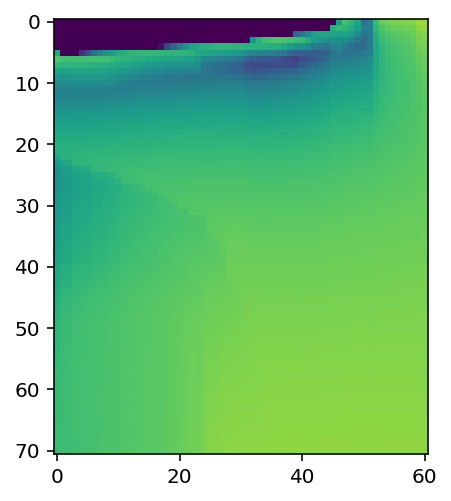

In [394]:
plt.imshow(exp1,vmax=1E-3,vmin=-1E-2)

In [395]:
exp1=exp5/exp1/1.6E-19*0.5

In [396]:
exp1=np.transpose(exp1)

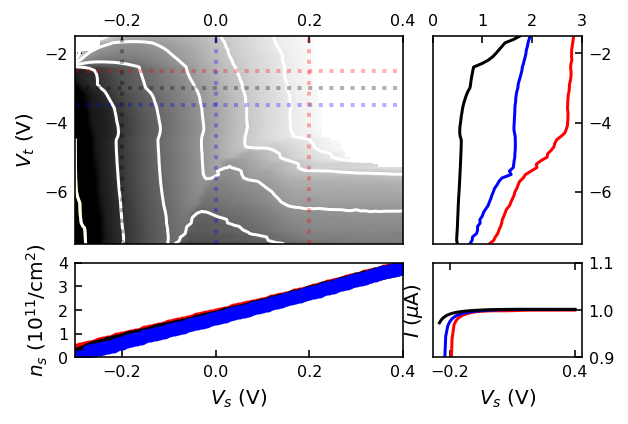

In [397]:
import matplotlib.gridspec as gridspec
x2=np.linspace(-7.5, -1.5, num=61)
x1=np.linspace(-0.3, 0.400, num=71)
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0:2, 0:2])
plt.tick_params(direction='in',labelbottom=False, bottom=False,labeltop=True,top=True)
plt.yticks([-2,-4,-6],fontsize=8)
plt.xticks(fontsize=8)
plt.axhline(y=x2[40], color='b', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x2[50], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x2[45], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[10], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[50], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[30], color='b', linestyle='dotted',lw=2, alpha=0.3)

###########################################################
#Contour
level0 = np.arange(0.1,0.2, 0.2)
CS = plt.contour(exp1, level0, extent=[-0.3,0.4,-7.5,-1.5],inline_spacing=0, colors='y')

levels = np.arange(0,3, 0.5)
CS = plt.contour(exp1*1E-15, levels, extent=[-0.3,0.4,-7.5,-1.5],inline_spacing=0, colors='w')

plt.ylabel("$V_t$ (V)", color='k',fontsize=10)
#plt.xlabel("$V_s$ (V)", color='k',fontsize=12)
plt.ylim(-7.5,-1.5)
plt.imshow(exp1,cmap='Greys_r',extent=[-0.3,0.4,-7.5,-1.5],vmax=3E15,vmin=0,interpolation='spline36', origin="lower",aspect='auto')
###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.42, 0.35, 0.165, 0.02]) 

plt.text(-1, 0, '0',color='k', rotation=0,fontsize=8)
plt.text(1.05, 0, '3',color='k', rotation=0,fontsize=8)
plt.text(0, -3, '$n_s$ ($10^{11}$/cm$^2$)',color='k', rotation=0,fontsize=10)

cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
#cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
#plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
 
#############################################################



#cb.set_label('$I$ ($\mu$A)', rotation=270)
ax2 = plt.subplot(gs[0:2, 2])

plt.plot(exp1[:,10]*1E-15,x2,'-k')
plt.plot(exp1[:,50]*1E-15,x2,'-r')
plt.plot(exp1[:,30]*1E-15,x2,'-b')
plt.ylim(-7.5,-1.5)
plt.xlim(0,3)
plt.tick_params(direction='in',labeltop=True, labelbottom=False, bottom=False,labelleft=False, top=True,left=False, labelright=True, right=True)
plt.yticks([-2,-4,-6],fontsize=8)
plt.xticks([0,1,2,3],fontsize=8)
#plt.yticks([0,1,2],fontsize=10)

#plt.ylabel("$I$ (nA)", color='k',fontsize=12)
#plt.ylim(0,2)
ax3 = plt.subplot(gs[2, 0:2])

plt.plot(x1,exp1[50]*1E-15,'-or')
plt.plot(x1,exp1[45]*1E-15,'-ok')
plt.plot(x1,exp1[40]*1E-15,'-ob')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0,4)
plt.xlim(-0.300,0.400)

plt.tick_params(direction='in')
plt.yticks([0,1,2,3,4],fontsize=8)
plt.xlabel("$V_s$ (V)", color='k',fontsize=10)
plt.ylabel("$n_s$ ($10^{11}$/cm$^2$)", color='k',fontsize=10)

ax4 = plt.subplot(gs[2, 2])

plt.plot(x1[5:71],-np.transpose(exp5)[10,5:71]/1E-6,'-r',lw=1.5)
plt.plot(x1[5:71],-np.transpose(exp5)[30,5:71]/1E-6,'-b',lw=1.5)
plt.plot(x1[5:71],-np.transpose(exp5)[50,5:71]/1E-6,'-k',lw=1.5)

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True,labelleft=False, top=True,left=False, labelright=True, right=True)
#plt.xlim(-0.3,0.4)
plt.ylim(0.9,1.1)
plt.xticks([-0.2,0.4],fontsize=8)
plt.yticks(fontsize=8)


plt.xlabel("$V_s$ (V)", color='k',fontsize=10)
plt.ylabel("$I$ ($\mu$A)", color='k',fontsize=10)


#plt.xlabel("$I$ ($\mu$A)", color='k',fontsize=10)
#plt.ylabel("$\Delta V_t/ \Delta V_s$ ", color='k',fontsize=10)
plt.savefig('D:\\cd2d.pdf',bbox_inches='tight', format='pdf',dpi=900)

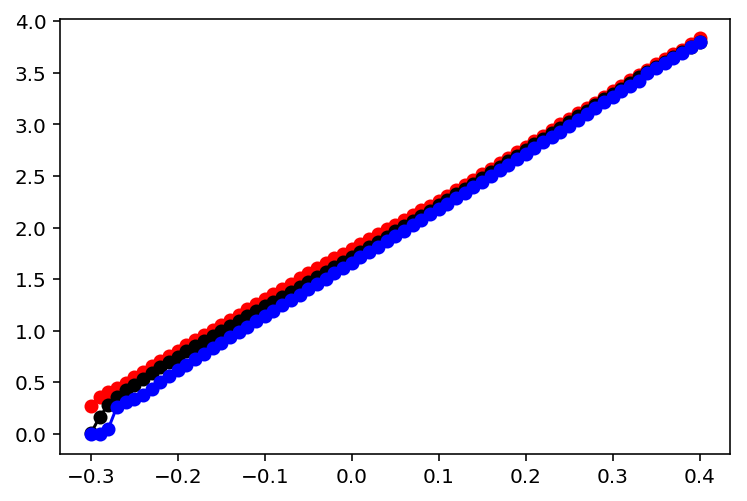

In [398]:
plt.plot(x1,exp1[50]*1E-15,'-or')
plt.plot(x1,exp1[45]*1E-15,'-ok')
plt.plot(x1,exp1[40]*1E-15,'-ob')

In [399]:
exp2=1/(exp1*np.transpose(r1)*1.6E-19)

In [400]:
exp2=exp2/3



In [401]:
exp1.shape

(61L, 71L)

In [402]:
for i in xrange(60):
    for j in xrange(70):
        if exp1[i,j]<0:
            exp1[i,j]=1E-6

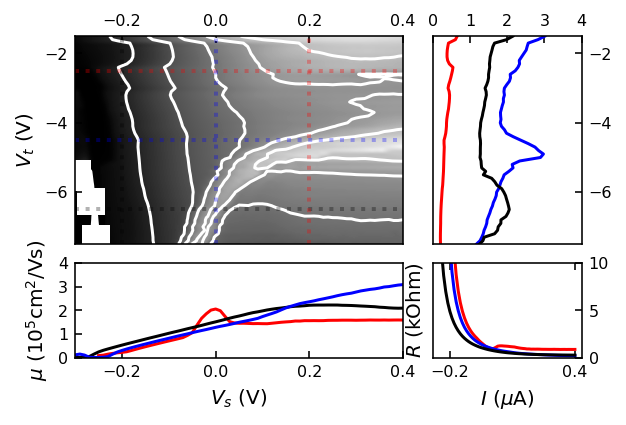

In [405]:
import matplotlib.gridspec as gridspec
x2=np.linspace(-7.5, -1.5, num=61)
x1=np.linspace(-0.3, 0.400, num=71)
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0:2, 0:2])
plt.tick_params(direction='in',labelbottom=False, bottom=False,labeltop=True,top=True)
plt.yticks([-2,-4,-6],fontsize=8)
plt.xticks(fontsize=8)
plt.axhline(y=x2[30], color='b', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x2[50], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axhline(y=x2[10], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[10], color='k', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[50], color='r', linestyle='dotted',lw=2, alpha=0.3)
plt.axvline(x=x1[30], color='b', linestyle='dotted',lw=2, alpha=0.3)

###########################################################
#Contour
#level0 = np.arange(0.1,0.2, 0.2)
#CS = plt.contour(exp1, level0, extent=[-0.3,0.4,-7.5,-1.5],inline_spacing=0, colors='y')

levels = np.arange(0,3, 0.5)
CS = plt.contour(exp2, levels, extent=[-0.3,0.4,-7.5,-1.5],inline_spacing=0, colors='w')

plt.ylabel("$V_t$ (V)", color='k',fontsize=10)
#plt.xlabel("$V_s$ (V)", color='k',fontsize=12)
plt.ylim(-7.5,-1.5)
plt.imshow(exp2,cmap='Greys_r',extent=[-0.3,0.4,-7.5,-1.5],vmax=4,vmin=0,interpolation='spline36', origin="lower",aspect='auto')
###########################################################
#COLORBAR

cbaxes = fig.add_axes([0.42, 0.35, 0.165, 0.02]) 

plt.text(-1, 0, '0',color='k', rotation=0,fontsize=8)
plt.text(1.05, 0, '3',color='k', rotation=0,fontsize=8)
plt.text(0, -3, '$\mu$ ($10^5$cm$^2$/Vs)',color='k', rotation=0,fontsize=10)

cbar=plt.colorbar(cax=cbaxes, ticks=[], orientation='horizontal',label='')
#cb=plt.colorbar(ticks=[0, 0.3, 0.7],label='I', orientation='horizontal') 
#plt.colorbar()
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
 
#############################################################



#cb.set_label('$I$ ($\mu$A)', rotation=270)
ax2 = plt.subplot(gs[0:2, 2])

plt.plot(exp2[:,10],x2,'-r')
plt.plot(exp2[:,50],x2,'-b')
plt.plot(exp2[:,30],x2,'-k')
plt.ylim(-7.5,-1.5)
plt.xlim(0,4)
plt.tick_params(direction='in',labeltop=True, labelbottom=False, bottom=False,labelleft=False, top=True,left=False, labelright=True, right=True)
plt.yticks([-2,-4,-6],fontsize=8)
plt.xticks([0,1,2,3,4],fontsize=8)
#plt.yticks([0,1,2],fontsize=10)

#plt.ylabel("$I$ (nA)", color='k',fontsize=12)
#plt.ylim(0,2)
ax3 = plt.subplot(gs[2, 0:2])

plt.plot(x1[5:71],exp2[10,5:71],'-r')
plt.plot(x1,exp2[50],'-k')
plt.plot(x1,exp2[30],'-b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0,4)
plt.xlim(-0.300,0.400)

plt.tick_params(direction='in')
plt.yticks([0,1,2,3,4],fontsize=8)
plt.xlabel("$V_s$ (V)", color='k',fontsize=10)
plt.ylabel("$\mu$ ($10^5$cm$^2$/Vs)", color='k',fontsize=10)

ax4 = plt.subplot(gs[2, 2])

plt.plot(x1[5:71],np.transpose(r1)[10,5:71]/1E3,'-r',lw=1.5)
plt.plot(x1[5:71],np.transpose(r1)[30,5:71]/1E3,'-b',lw=1.5)
plt.plot(x1[5:71],np.transpose(r1)[50,5:71]/1E3,'-k',lw=1.5)

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True,labelleft=False, top=True,left=False, labelright=True, right=True)
#plt.xlim(-0.3,0.4)
plt.ylim(0,10)
plt.xticks([-0.2,0.4],fontsize=8)
plt.yticks(fontsize=8)


plt.xlabel("$I$ ($\mu$A)", color='k',fontsize=10)
plt.ylabel("$R$ (kOhm)", color='k',fontsize=10)
plt.savefig('D:\\mob2d.pdf',bbox_inches='tight', format='pdf',dpi=900)

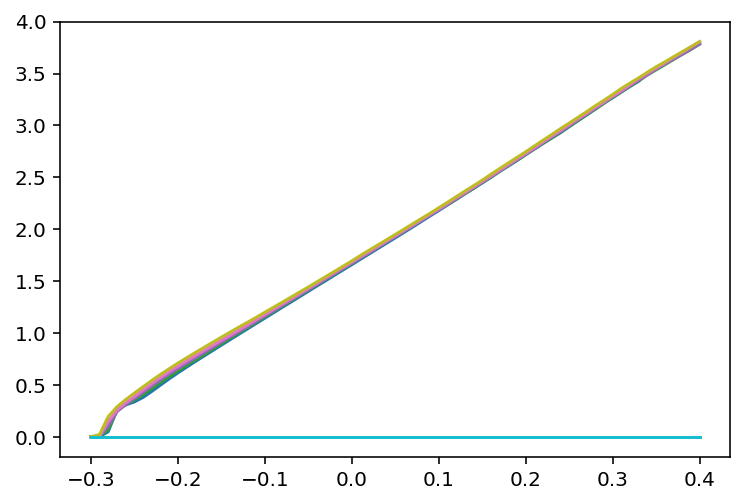

In [407]:

    plt.plot(x1,exp2[i]*1E-15,'-')


In [382]:
#x2[20]
#x2[45]
#x2[50]

-5.5

In [387]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

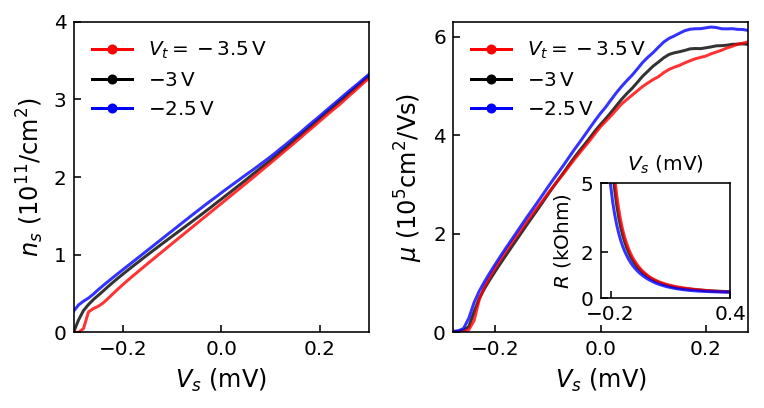

In [478]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.8, hspace=1)

ax1 = plt.subplot(gs[0:3, 0:2])
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=4, label='$V_t=-3.5\,$V')
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=4,label='$-2.5\,$V')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=4,label='$-3\,$V')
leg=plt.legend(handles=[red_patch,black_patch,blue_patch],loc=2,fontsize=10)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

plt.plot(x1,exp1[45]*1E-15,'-k',lw=1.5,alpha=0.8)
plt.plot(x1,exp1[40]*1E-15,'-r',lw=1.5,alpha=0.8)
plt.plot(x1,exp1[50]*1E-15,'-b',lw=1.5,alpha=0.8)
plt.xlim(-0.3,0.3)
#plt.plot(x3[1:26],(-1/m4[1:26]/0.05),'-or')
#plt.ylim(0,3)
#plt.xlim(-200,400)
plt.ylabel("$n_s$ ($10^{11}$/cm$^2$)", color='k',fontsize=12)
plt.xlabel("$V_s$ (mV)", color='k',fontsize=12)
plt.tick_params(direction='in')

#plt.yticks([1,2,3],fontsize=10)
#plt.plot(-exp1[:,100]*1E6,x1,'-k')
#plt.plot(-exp1[:,60]*1E6,x1,'-b')
#plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True,labelleft=False, top=True,left=False, labelright=True, right=True)
#plt.yticks([0,1,2],fontsize=10)
#plt.xlabel("$I$ ($\mu$A)", color='k',fontsize=12)
#plt.ylabel("$I$ (nA)", color='k',fontsize=12)
plt.ylim(0,4)
ax2 = plt.subplot(gs[0:3, 2:4])
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=4, label='$V_t=-3.5\,$V')
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=4,label='$-2.5\,$V')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=4,label='$-3\,$V')
leg=plt.legend(handles=[red_patch,black_patch,blue_patch],loc=2,fontsize=10)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

plt.ylabel("$\mu$ ($10^5$cm$^2$/Vs)", color='k',fontsize=12)

plt.xlabel("$V_s$ (mV)", color='k',fontsize=12)

plt.plot(x1,3*exp2[45],'-k',lw=1.5,alpha=0.8)
plt.plot(x1,3*exp2[40],'-r',lw=1.5,alpha=0.8)
plt.plot(x1,3*exp2[47],'-b',lw=1.5,alpha=0.8)
plt.xlim(-0.28,0.28)
#plt.plot(x2[1:27],(-1/m2[1:27]/160),'-ob')
#plt.plot(x3[1:26],(-1/m3[1:26]/160),'-or')
plt.tick_params(direction='in')
plt.ylim(0,6.3)
plt.yticks([0,2,4,6],fontsize=10)
a = plt.axes([.61, .4, .15, .2], facecolor='w')


plt.plot(x1[5:71],np.transpose(r1)[45,5:71]/1E3,'-k',lw=1.5,markersize=3,alpha=0.8)
plt.plot(x1[5:71],np.transpose(r1)[40,5:71]/1E3,'-r',lw=1.5,markersize=3,alpha=0.8)
plt.plot(x1[5:71],np.transpose(r1)[50,5:71]/1E3,'-b',lw=1.5,markersize=3,alpha=0.8)

plt.ylim(0,5)
plt.xlim(-0.25,0.28)
plt.tick_params(direction='in',left=True, labelleft=True)
plt.xticks([-0.2,0.4],fontsize=10)
plt.yticks([0,2,5],fontsize=10)
#plt.xlabel("$V_s$ (V)", color='k',fontsize=12)
plt.ylabel("$R$ (kOhm)", color='k',fontsize=10)
plt.title("$V_s$ (mV)", color='k',fontsize=10)

plt.savefig('D:\\carrier.pdf',bbox_inches='tight', format='pdf',dpi=900)

[ 5.14548274  1.73405245]


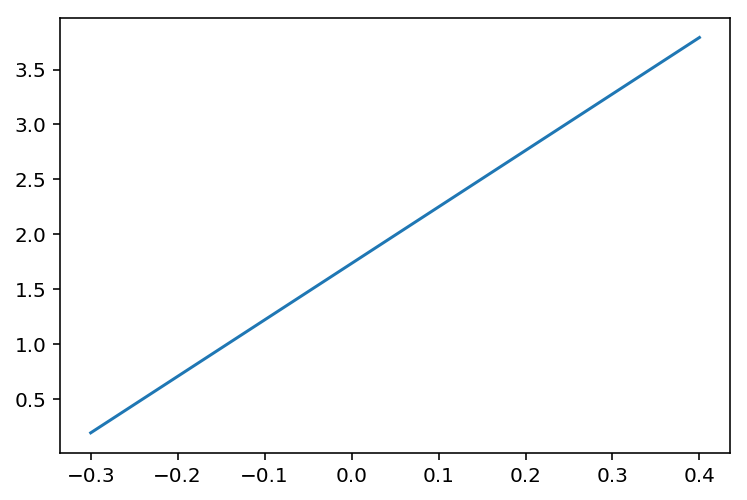

In [493]:
p=np.polyfit(x1,exp1[45]*1E-15,1)
print p
f=np.polyval(p,x1)
plt.plot(x1,f)

(1.5, 2.5)

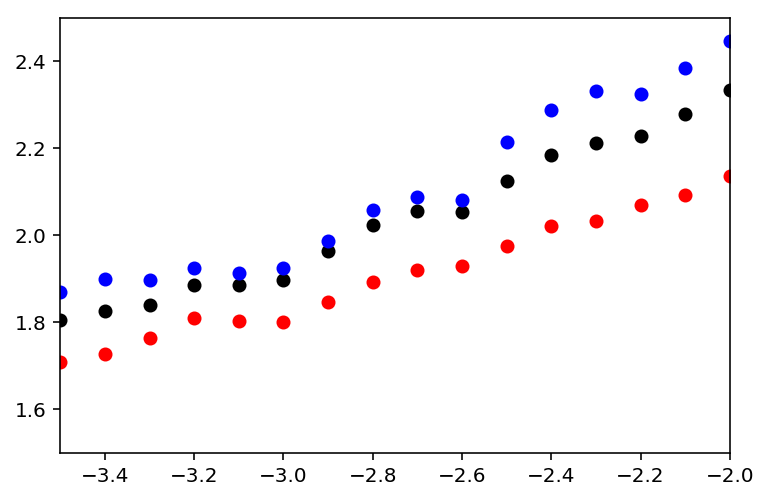

In [488]:
plt.plot(x2,exp2[:,40],'or')
plt.plot(x2,exp2[:,45],'ok')
plt.plot(x2,exp2[:,50],'ob')
plt.xlim(-3.5,-2)
plt.ylim(1.5,2.5)



In [484]:
x1[50]

0.20000000000000001